In [136]:
import imp # for reloading modules
import matplotlib.pyplot as plt # for plotting
import matplotlib
import numpy as np

import utils # for loading data
imp.reload(utils)

<module 'utils' from 'c:\\Users\\Christine Lagorce\\Desktop\\X M2\\ComputerVision\\utils.py'>

In [137]:
labels = (utils.get_annotations('Data/data1/annotations'))
images = utils.get_images('Data/data1/images')
image_path_list =  utils.get_file_in_folder('Data/data1/images')

Loading annotations...
Loading images...


c:\Users\Christine Lagorce\Desktop\X M2\ComputerVision\utils.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [138]:
#we only need the images with labels : "with_mask" and "without_mask"
id = []
for i in range(len(labels)):
    if labels[i] == 'mask_weared_incorrect':
        id.append(i)
        
images = np.delete(images, id, axis=0)
labels = np.delete(labels, id, axis=0)

In [139]:
import torch
# we load the pretrained model
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
model.eval()
print('model loaded')

Using cache found in C:\Users\Christine Lagorce/.cache\torch\hub\pytorch_vision_v0.10.0


model loaded


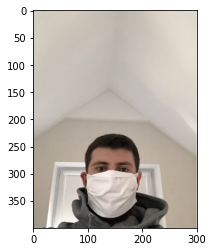

In [154]:
import PIL
image1 = images[2]
plt.imshow(image1)

random_array = np.random.random_sample(image1.shape) * 255
random_array = random_array.astype(np.uint8)

img = PIL.Image.fromarray(random_array).convert('RGB')

In [153]:
# input_image = Image.open('data/data1/images/maksssksksss0.png')

In [155]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = img
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)


In [156]:
class_list = utils.read_classes('resnet_class.txt')
class_list = np.array(class_list)

In [157]:
with open("resnet_class.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

jellyfish 0.057323604822158813
sea snake 0.02352979965507984
jigsaw puzzle 0.017899930477142334
hammerhead 0.017247505486011505
doormat 0.016665546223521233
